# Clustering Algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [ ]:
flame = pd.read_csv('./datasets/flame.csv')
agg = pd.read_csv('./datasets/aggregation.csv')
spiral = pd.read_csv('./datasets/spiral.csv')
r15 = pd.read_csv('./datasets/r15.csv')
path = pd.read_csv('./datasets/pathbased.csv')
jain = pd.read_csv('./datasets/jain.csv')
comp = pd.read_csv('./datasets/compound.csv')

In [ ]:
datasets = {'flame' : flame, 'agg' : agg, 'spiral' : spiral, 'r15' : r15, 
            'path' : path, 'jain' : jain, 'comp' : comp}

In [ ]:
comp.head()

In [ ]:
def plot_dataset(title, dataset):
    plt.figure(figsize = (8,6))
    plt.title(title)
    plt.scatter(dataset['x'], dataset['y'], c = dataset['label'], cmap = 'seismic')

In [ ]:
for title, dataset in datasets.items():
    plot_dataset(title, dataset)

### Fit and compare kmeans, agglomerative, and dbscan to flame dataset

In [ ]:
flame_no_label = flame.loc[:, ['x', 'y']]

In [ ]:
## fit kmeans model to flame dataset

kmeans = flame_no_label.copy()
kmeans_mod = KMeans(n_clusters = 3)
kmeans_mod.fit(flame_no_label)
kmeans['label'] = kmeans_mod.labels_

In [ ]:
## fit agglomerative model to flame dataset

agglom = flame_no_label.copy()
agglom_mod = AgglomerativeClustering(n_clusters = 2)
agglom_mod.fit(flame_no_label)
agglom['label'] = agglom_mod.labels_

In [ ]:
## fit dbscan model to flame dataset

dbscan = flame_no_label.copy()
dbscan_mod = DBSCAN(eps = .82, min_samples = 3)
dbscan_mod.fit(flame_no_label)
dbscan['label'] = dbscan_mod.labels_

In [ ]:
plot_dataset('flame', flame)
plot_dataset('kmeans', kmeans)
plot_dataset('agglom', agglom)
plot_dataset('dbscan', dbscan)

### Let's try spiral

In [ ]:
spiral_no_label = spiral.loc[:, ['x', 'y']]

In [ ]:
## fit kmeans model to spiral dataset

kmeans = spiral_no_label.copy()
kmeans_mod = KMeans(n_clusters = 3)
kmeans_mod.fit(spiral_no_label)
kmeans['label'] = kmeans_mod.labels_

In [ ]:
agglom = spiral_no_label.copy()
agglom_mod = AgglomerativeClustering(n_clusters = 3)
agglom_mod.fit(spiral_no_label)
agglom['label'] = agglom_mod.labels_

In [ ]:
## fit dbscan model to spiral dataset

dbscan = spiral_no_label.copy()
dbscan_mod = DBSCAN(eps = 2, min_samples = 4)
dbscan_mod.fit(spiral_no_label)
dbscan['label'] = dbscan_mod.labels_

In [ ]:
plot_dataset('spiral', spiral)
plot_dataset('kmeans', kmeans)
plot_dataset('agglom', agglom)             
plot_dataset('dbscan', dbscan)

## Credit Card Customer Clustering

In [2]:
cc_df = pd.read_csv('./datasets/CC_GENERAL.csv')

In [3]:
cc_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [5]:
cc_df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [6]:
cc_df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
cc_df[cc_df['CREDIT_LIMIT'].isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [8]:
## FILL NAs with median (more research should really be done on why min payment is 0. Might be a promotion, etc.)

cc_df['MINIMUM_PAYMENTS'] = cc_df['MINIMUM_PAYMENTS'].fillna(cc_df['MINIMUM_PAYMENTS'].median())

In [9]:
cc_df.dropna(inplace=True)

In [10]:
cc_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [11]:
from sklearn.preprocessing import StandardScaler, power_transform
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [12]:
cc_df.drop('CUST_ID', inplace = True, axis = 1)

In [13]:
X = cc_df.copy()

In [14]:
X = power_transform(X, 'yeo-johnson')

In [15]:
scaler = StandardScaler()

In [16]:
X_sc = scaler.fit_transform(X)

In [17]:
X_sc

array([[-1.23833786, -1.0801604 , -0.36831098, ..., -0.82501312,
        -0.67793662,  0.42210751],
       [ 1.05188287, -0.4256199 , -1.50536123, ...,  0.91749237,
         1.23484635,  0.42210751],
       [ 0.86050618,  0.62852726,  0.52149237, ...,  0.47593118,
        -0.67793662,  0.42210751],
       ...,
       [-1.40957025, -0.9921333 , -0.21655169, ..., -1.30176614,
         1.32828513, -2.52719186],
       [-1.55874115, -0.9921333 , -1.50536123, ..., -1.66213386,
         1.32828513, -2.52719186],
       [-0.32454944, -1.6469605 ,  0.70189133, ..., -1.23885956,
        -0.67793662, -2.52719186]])

In [18]:
n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    cost.append(kmean.inertia_)  

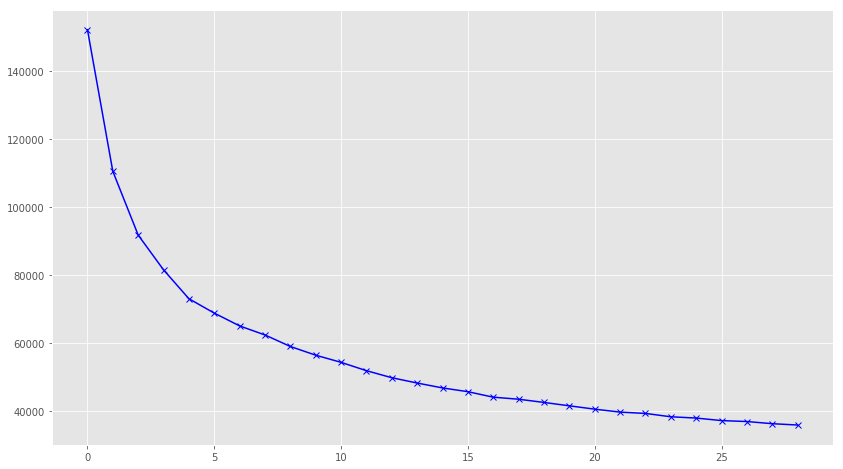

In [31]:
plt.figure(figsize=(14,8))
plt.plot(cost, 'bx-')

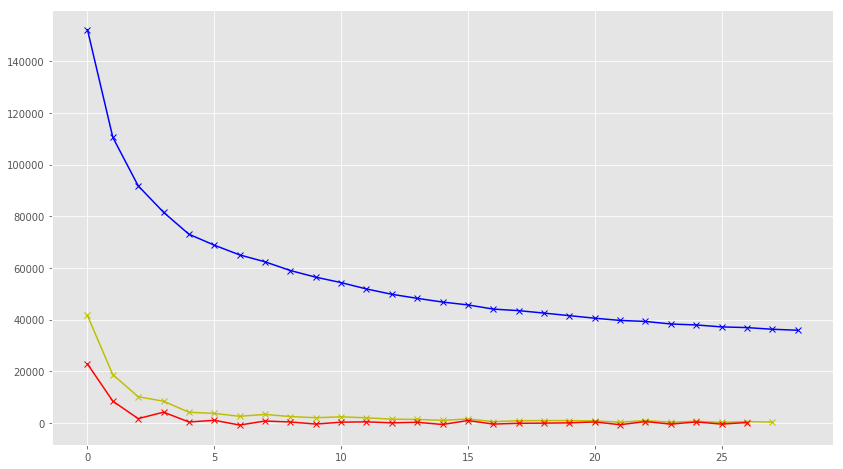

4


In [56]:
def find_elbow(cost, bound):
    low = 1 - bound
    high = 1+ + bound
    n = len(cost)-1
    slope = []
    for i in range(n):
        slope.append(cost[i]-cost[i+1])
    concavity = []
    for i in range(n-1):
        concavity.append(slope[i]-slope[i+1])
    for i in range(n-2):
        if (low*slope[i]<=slope[i+1]<=high*slope[i]):# & (low*slope[i]<=slope[i+2]<=high*slope[i]):
            return concavity, slope, i
    return concavity, slope, 'failed'

concavity, slope, i = find_elbow(cost, .15)

plt.figure(figsize=(14,8))
plt.plot(cost, 'bx-')
plt.plot(slope, 'yx-')
plt.plot(concavity, 'rx-')
plt.show()
print(i)

In [20]:
kmean= KMeans(5)
kmean.fit(X)
labels=kmean.labels_

In [21]:
X = pd.DataFrame(X, columns = cc_df.columns)

In [22]:
clusters=pd.concat([X, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,-1.238338,-1.080160,-0.368311,-1.000587,0.383490,-0.944443,-0.767073,-0.903388,-0.606798,-0.883112,-0.905730,-0.573879,-1.425281,-0.984331,-0.825013,-0.677937,0.422108,4
1,1.051883,-0.425620,-1.505361,-1.000587,-1.085536,1.399858,-1.278999,-0.903388,-1.004536,1.124507,1.044306,-1.387809,0.924151,1.285324,0.917492,1.234846,0.422108,3
2,0.860506,0.628527,0.521492,1.065269,-1.085536,-0.944443,1.218811,1.732520,-1.004536,-0.883112,-0.905730,0.494594,1.012124,-0.291996,0.475931,-0.677937,0.422108,2
3,0.570390,-1.711452,0.875720,1.229487,-1.085536,0.680576,-1.016108,-0.092379,-1.004536,0.136204,0.194588,-0.872928,1.012124,-2.783284,-0.116004,-0.677937,0.422108,2
4,0.111719,0.628527,-0.905055,-0.020124,-1.085536,-0.944443,-1.016108,-0.092379,-1.004536,-0.883112,-0.905730,-0.872928,-1.215649,-0.231929,-0.327607,-0.677937,0.422108,2


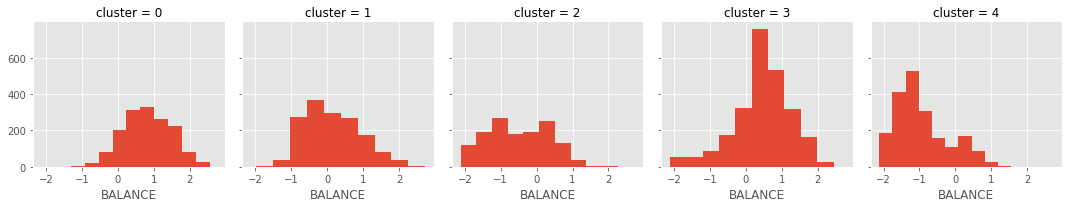

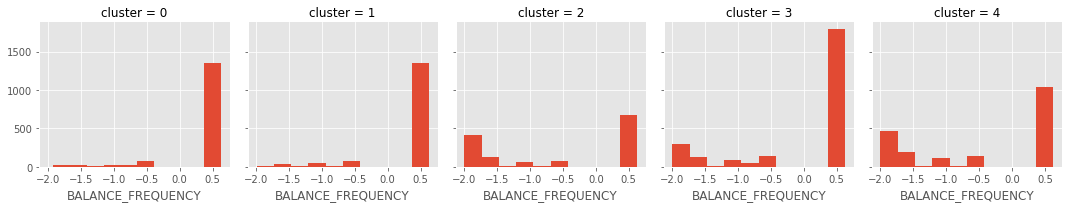

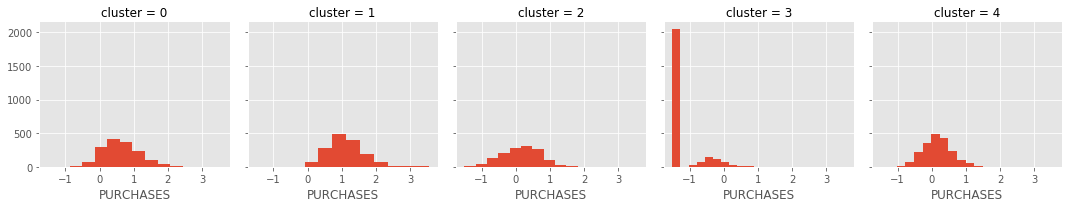

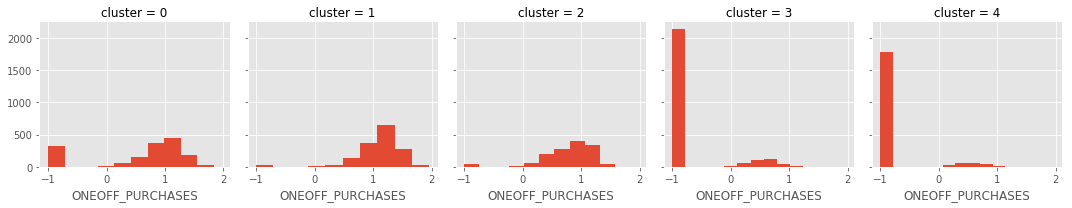

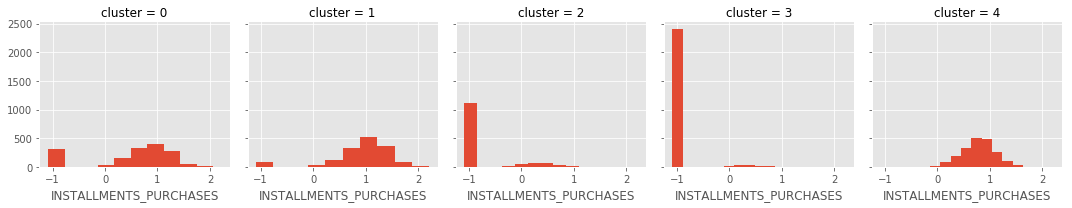

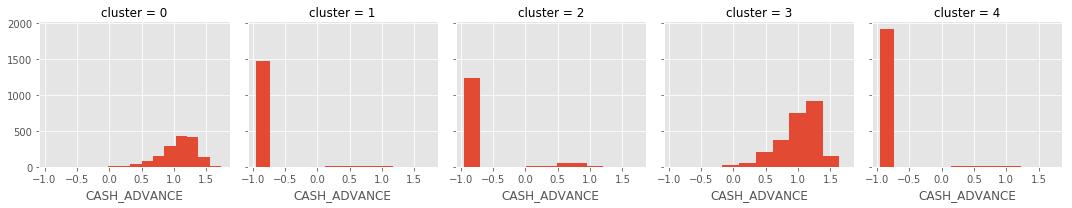

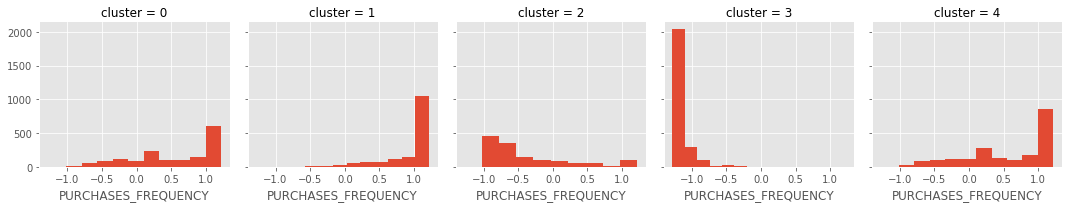

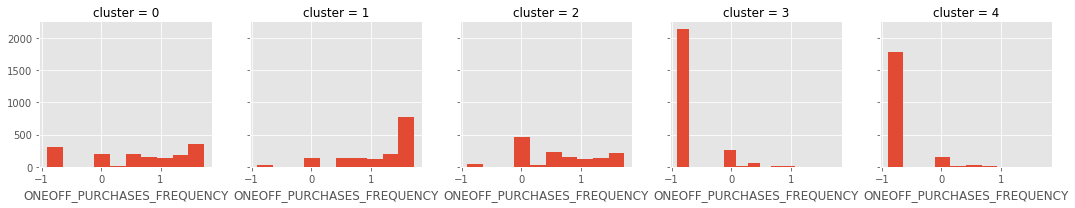

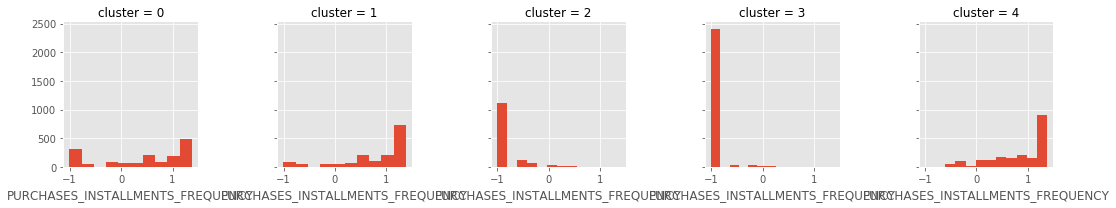

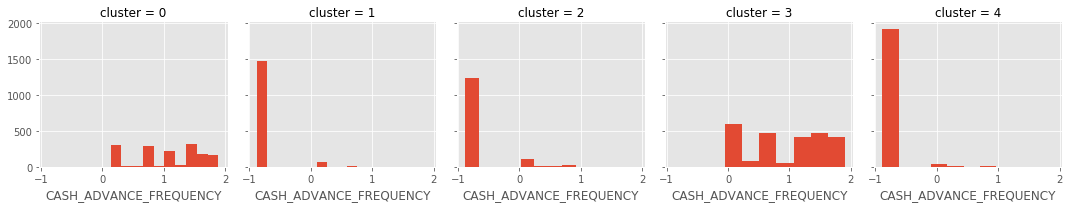

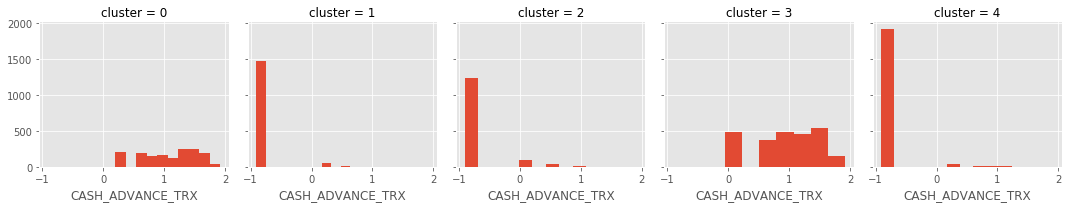

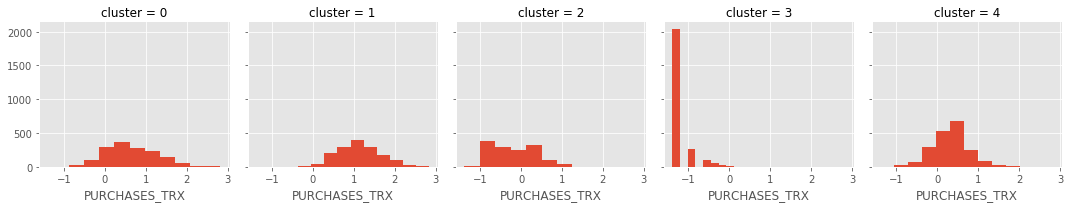

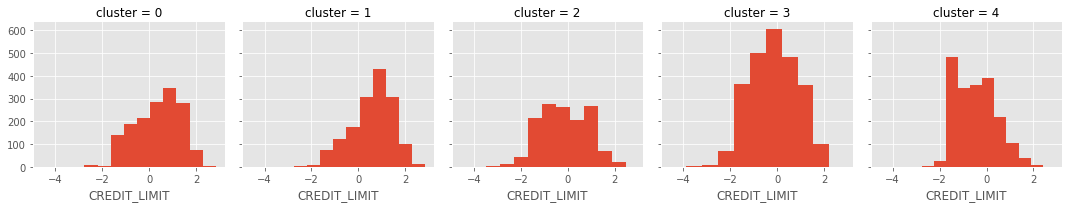

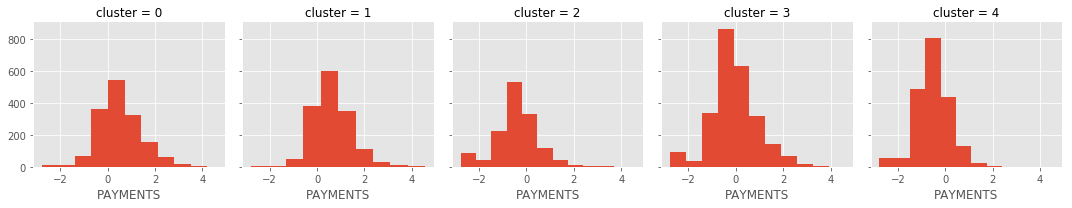

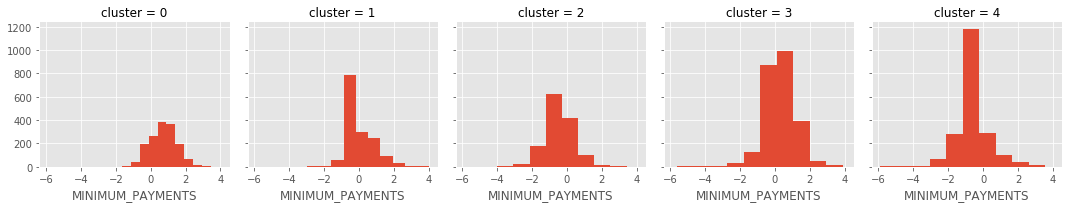

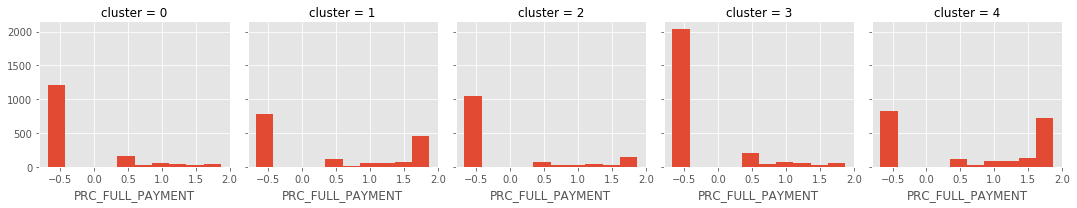

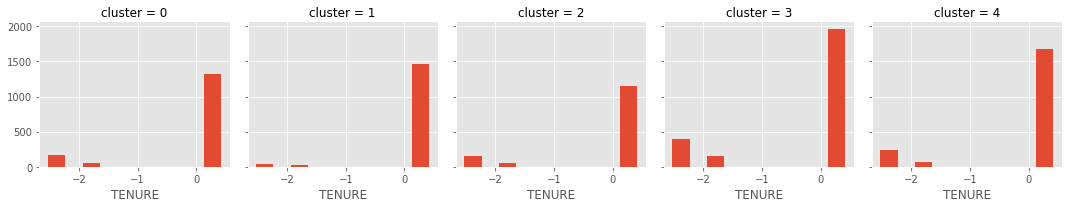

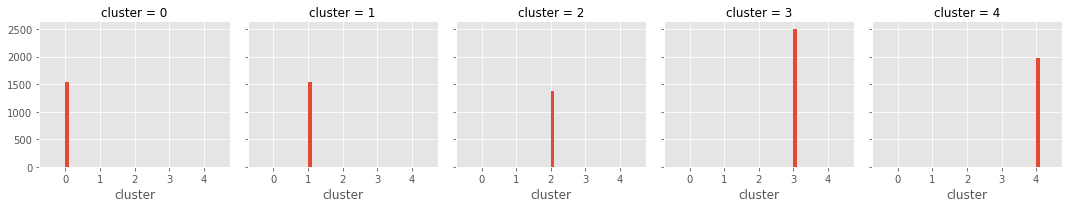

In [23]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

In [24]:
dist = 1 - cosine_similarity(X)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8949, 2)

C:\Users\cliff\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\cliff\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\cliff\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\cliff\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecatio

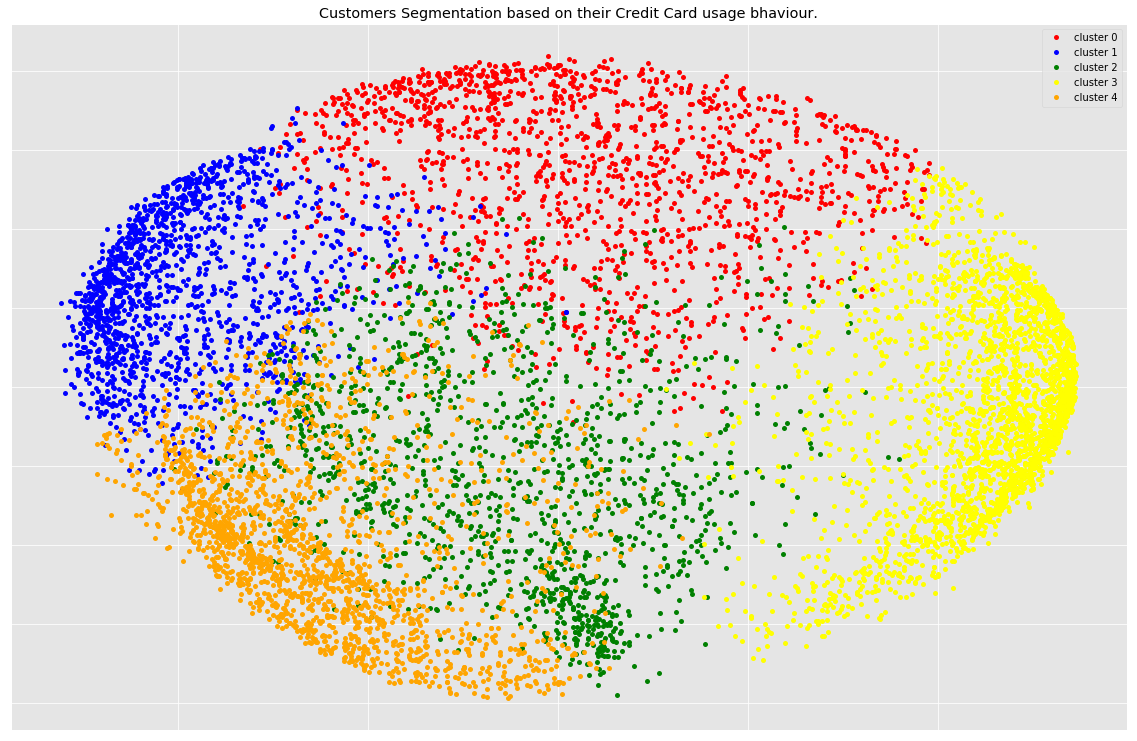

In [25]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple'}

names = {0: 'cluster 0', 
         1: 'cluster 1', 
         2: 'cluster 2', 
         3: 'cluster 3', 
         4: 'cluster 4',
         5: 'cluster 5'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()